In [44]:
"""
    author: Suhas Vittal
    date:   7 March 2024
"""

surface_codes = [
# SURFACE CODES -- SMALL
    'hysc/4_5/60_8_4_6',
    'hysc/5_5/30_8_3_3',
    'hysc/5_5/80_18_5_5',
    'hysc/5_6/60_18_3_4',
# SURFACE CODES -- MEDIUM
    'hysc/4_5/160_18_6_8',
    'hysc/5_6/120_34_5_6'
]

color_codes = [
# COLOR CODES -- SMALL
    'hycc/4_6/24_8_4_4',
    'hycc/4_6/96_20_7_7',
    'hycc/4_8/32_12_4_4',
# COLOR CODES -- MEDIUM
    'hycc/4_6/192_36_8_8',
    'hycc/4_8/144_40_8_8'
]

all_codes = [*surface_codes, *color_codes]

# Color palette:
c1 = '#7D0A0A'
c2 = '#BF3131'
c3 = '#EAD196'
c4 = '#F3EDC8'
c5 = '#004225'
c6 = '#F5F5DC'
c7 = '#FFB000'
c8 = '#FFCF9D'

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

from collections import defaultdict

plt.rcParams['pdf.fonttype'] = 42

In [58]:
def get_arch_stats(benchmark, version):
    fname = f'../../data/protean/{benchmark}/v{version}/stats.txt'
    with open(fname, 'r') as reader:
        lines = reader.readlines()[1:] # Ignore the first line -- just a header.
    stats = {}
    for line in lines:
        d = line.split(',')
        stats[d[0]] = float(d[1])
    return stats

def code_name(benchmark):
    return benchmark.split('/')[2]

def get_stats_from_code_name(name):
    # Format is n_k_dz_dx
    d = name.split('_')
    return { 'n': int(d[0]), 'k': int(d[1]), 'dz': int(d[2]), 'dx': int(d[3]) }

def format_code_name(name):
    stats = get_stats_from_code_name(name)
    n, k, dz, dx = stats['n'], stats['k'], stats['dz'], stats['dx']
    return '[[%d, %d, %d, %d]]' % (n, k, dz, dx) 

all_arch_stats.pdf: geomeans: [1.0, 2.3044192895385187, 1.6020552103504515, 3.301573890706443, 2.0224291337402724]


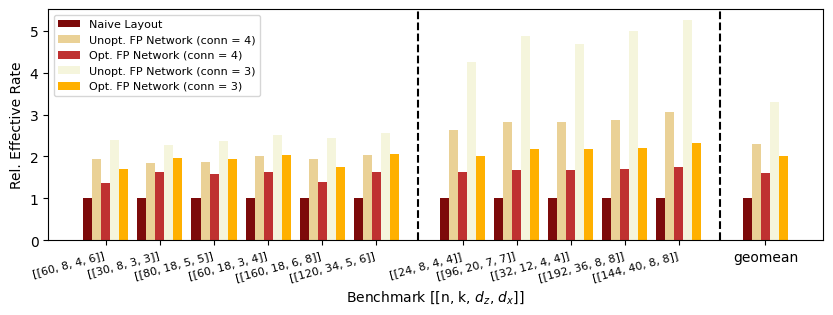

In [120]:
def plot_arch_histogram(output_file):
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 3)

    sc_names = [ format_code_name(code_name(b)) for b in surface_codes ]
    cc_names = [ format_code_name(code_name(b)) for b in color_codes ]
    names = [ *sc_names, *cc_names ]

    code_div_line = len(sc_names)+0.1
    geomean_div_line = len(names)+0.7
    
    x = []
    for i in range(len(sc_names)):
        x.append(i)
    for i in range(len(cc_names)):
        x.append(i+len(sc_names)+0.6)
    x.append(len(names)+1.2)
    x = np.array(x)


    names.append('geomean')
    
    width = 1/6
    multiplier = 0
    # Plot arch statistics.
    labels = [
                'Naive Layout',
                'Unopt. FP Network (conn = 4)',
                'Opt. FP Network (conn = 4)',
                'Unopt. FP Network (conn = 3)',
                'Opt. FP Network (conn = 3)'
             ]
    base_rates = []
    colors = [c1, c3, c2, c6, c7]
    gmeans = []
    for (i, v) in enumerate(['1', '2.2', '3.2', '2.3', '4.2']):
        off = width*multiplier
        y = []
        for (j, b) in enumerate(all_codes):
            arch_stats = get_arch_stats(b, v)
            code_stats = get_stats_from_code_name(code_name(b))
            # We care about the rate.
            rate = arch_stats['Qubits'] / code_stats['k']
            if i == 0:
                base_rates.append(rate)
            rel_rate = rate / base_rates[j]
            y.append(rel_rate)
        y.append(sp.stats.gmean(y))
        y = np.array(y)
        ax.bar(x + off, y, width, label=labels[i], color=colors[i])
        multiplier += 1
        gmeans.append(y[-1])
        
    ax.set_xlabel('Benchmark [[n, k, $d_z$, $d_x$]]', fontsize=10)
    ax.set_ylabel('Rel. Effective Rate', fontsize=10)
    ax.set_xticks(x + 2*width, names, rotation=15, ha='right', fontsize=8)
    ax.axvline(x=code_div_line, linestyle='--', color='k')
    ax.axvline(x=geomean_div_line, linestyle='--', color='k')
    ax.legend(fontsize=8)

    # realign geomean
    ticks = ax.get_xticklabels()
    ticks[-1].set_rotation(0)
    ticks[-1].set_horizontalalignment('center')
    ticks[-1].set_fontsize(10)

    plt.savefig(f'plots/{output_file}', bbox_inches='tight')
    print(f'{output_file}: geomeans: {gmeans}')

plot_arch_histogram('all_arch_stats.pdf')

In [139]:
def get_error_rates_from_file(f):
    with open(f, 'r') as reader:
        lines = reader.readlines()[1:]
    X, Y = [], []
    for line in lines:
        d = line.split(',')
        if float(d[-1]) > 0:
            X.append(float(d[0]))
            Y.append(float(d[-1]))
    return X, Y

def get_rsc_error_rates(d):
    f = f'../../data/protean/rsc/output/d{d}.csv'
    return get_error_rates_from_file(f)

def get_code_error_rates(code, version):
    f = f'../../data/protean/{code}/v{version}/output/basic_memory_z.csv'
    return get_error_rates_from_file(f)


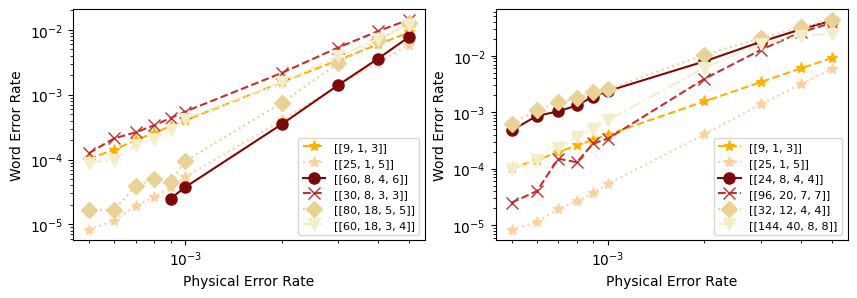

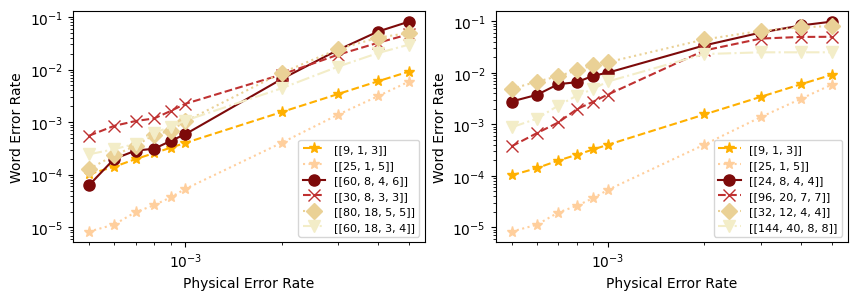

In [141]:
ler_sc = [
    'hysc/4_5/60_8_4_6',
    'hysc/5_5/30_8_3_3',
    'hysc/5_5/80_18_5_5',
    'hysc/5_6/60_18_3_4',
]

ler_cc = [
    'hycc/4_6/24_8_4_4',
    'hycc/4_6/96_20_7_7',
    'hycc/4_8/32_12_4_4',
    'hycc/4_8/144_40_8_8',
]

def plot_codes_on_ax(benchmarks, ax, version):
    linestyles = ['o-', 'x--', 'D:', 'v-.']
    colors = [c1, c2, c3, c4]
    for (i, b) in enumerate(benchmarks):
        k1, k2 = i % len(linestyles), i % len(colors)
        X, Y = get_code_error_rates(b, version)
        ax.plot(X, Y, linestyles[k1], color=colors[k2], ms=8, label=format_code_name(code_name(b)))

def plot_error_rate_wrt_surface_code(output_file, version):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 3)
    # Plot LER for surface code first on both axes.
    rsc_d5_X, rsc_d5_Y = get_rsc_error_rates(3)
    rsc_d7_X, rsc_d7_Y = get_rsc_error_rates(5)

    for ax in (ax1, ax2):
        ax.plot(rsc_d5_X, rsc_d5_Y, '*--', color=c7, ms=8, label='[[9, 1, 3]]')
        ax.plot(rsc_d7_X, rsc_d7_Y, '*:', color=c8, ms=8, label='[[25, 1, 5]]')
    plot_codes_on_ax(ler_sc, ax1, version)
    plot_codes_on_ax(ler_cc, ax2, version)
    for ax in (ax1, ax2):
        ax.set_xlabel('Physical Error Rate', fontsize=10)
        ax.set_ylabel('Word Error Rate', fontsize=10)
        ax.legend(fontsize=8)
        ax.set_xscale('log')
        ax.set_yscale('log')

    plt.savefig(f'plots/{output_file}', bbox_inches='tight')

plot_error_rate_wrt_surface_code('error_rates_conn4.pdf', '3.2')
plot_error_rate_wrt_surface_code('error_rates_conn3.pdf', '4.2')